In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

# Read the dataset
data_new = pd.read_csv('falldetection.csv')

# Extract dataset until row 70316
data = data_new.iloc[:10000]

# Now 'extracted_df' contains the dataset up to row 70316

print(data)
#data.drop(columns=['Trial'])
data.replace('#VALUE!', 0, inplace=True)

# Convert all columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data.dropna(inplace=True)

# Assuming 'Tag' is the target variable
target_variable = 'Activity'

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Identify important features based on correlation with the target variable
important_features = correlation_matrix[target_variable].sort_values(ascending=False)[1:]  # Exclude the target variable itself
print("Important Features:")
print(important_features)

# Print the 10 most important features
print("Top 10 Most Important Features:")
print(important_features.head(20))

num_rows = data.shape[0]
print("Number of rows:", num_rows)

                      TimeStamps  AnkleAccelerometer_x-axis (g)  \
0     2018-07-04T12:04:17.738369                         -1.005   
1     2018-07-04T12:04:17.738370                         -1.005   
2     2018-07-04T12:04:17.738371                         -1.005   
3     2018-07-04T12:04:17.738372                         -1.005   
4     2018-07-04T12:04:17.738373                         -1.008   
...                          ...                            ...   
2994                         NaN                         -1.938   
2995                         NaN                         -0.956   
2996                         NaN                          0.029   
2997                         NaN                          0.029   
2998                         NaN                         -0.587   

      AnkleAccelerometer_y-axis (g)  AnkleAccelerometer_z-axis (g)    SVM(n)  \
0                             0.229                         -0.083  1.034096   
1                             0.228

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


Important Features:
AnkleAccelerometer_x-axis (g)               NaN
AnkleAccelerometer_y-axis (g)               NaN
AnkleAccelerometer_z-axis (g)               NaN
SVM(n)                                      NaN
Theta(n)                                    NaN
AnkleAngularVelocity_x-axis (deg/s)         NaN
AnkleAngularVelocity_y-axis (deg/s)         NaN
AnkleAngularVelocity_z-axis (deg/s)         NaN
Ankleluminosity                             NaN
RightPocketAccelerometer_x-axis (g)         NaN
RightPocketAccelerometer_y-axis (g)         NaN
RightPocketAccelerometer_z-axis (g)         NaN
RightPocketAngularVelocity_x-axis (deg/s)   NaN
RightPocketAngularVelocity_y-axis (deg/s)   NaN
RightPocketAngularVelocity_z-axis (deg/s)   NaN
NeckLuminosity                              NaN
BeltAccelerometer_x-axis (g)                NaN
BeltAccelerometer_y-axis (g)                NaN
BeltAccelerometer_z-axis (g)                NaN
BeltAngularVelocity_x-axis (deg/s)          NaN
BeltAngularVelocity_

In [ ]:
from datetime import datetime

timestamp_str = "2018-07-04T12:04:17.738369"
timestamp_obj = datetime.fromisoformat(timestamp_str)
unix_time = int(timestamp_obj.timestamp())  # Convert to Unix time (seconds since epoch)
print(unix_time)


1530705857


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named df and you want to find unique values in a column named 'column_name'
unique_values = data['Activity'].unique()

print(unique_values)

value_counts = data['Activity'].value_counts()

print(value_counts)


[1 0]
Activity
0    59387
1    10473
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Identify unique values and their counts
value_counts = data['Activity'].value_counts()

# Determine target count (e.g., the minimum count among all unique values)
target_count = value_counts.min()

# Downsample each unique value to match the target count
downsampled_data = pd.DataFrame()
for value in value_counts.index:
    value_data = data[data['Activity'] == value]
    downsampled_value_data = value_data.sample(n=target_count, random_state=42)
    downsampled_data = pd.concat([downsampled_data, downsampled_value_data])

    print(downsampled_data)

# Save or use the downsampled_data for further analysis


       AnkleAccelerometer_x-axis (g)  AnkleAccelerometer_y-axis (g)  \
11475                         -0.995                          0.278   
64664                         -0.975                          0.050   
46427                         -0.978                          0.288   
16127                          0.187                          0.967   
16650                          0.193                          0.964   
...                              ...                            ...   
21981                         -1.079                         -0.035   
38831                         -1.023                          0.247   
61171                         -0.989                          0.083   
55915                         -0.623                         -0.428   
8712                          -1.010                          0.226   

       AnkleAccelerometer_z-axis (g)    SVM(n)   Theta(n)  \
11475                         -0.073  1.035682  15.570392   
64664                    

In [ ]:
import pandas as pd

df=downsampled_data

# Assuming you have a DataFrame named df and you want to find unique values in a column named 'column_name'
unique_values = df['Activity'].unique()

print(unique_values)

value_counts = df['Activity'].value_counts()

print(value_counts)


[0 1]
Activity
0    10473
1    10473
Name: count, dtype: int64


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)
# Or fill missing values with mean, median, or mode
df.fillna(df.mean(), inplace=True)


null_counts=df.isnull().sum()
print(null_counts)

AnkleAccelerometer_x-axis (g)                0
AnkleAccelerometer_y-axis (g)                0
AnkleAccelerometer_z-axis (g)                0
SVM(n)                                       0
Theta(n)                                     0
AnkleAngularVelocity_x-axis (deg/s)          0
AnkleAngularVelocity_y-axis (deg/s)          0
AnkleAngularVelocity_z-axis (deg/s)          0
Ankleluminosity                              0
RightPocketAccelerometer_x-axis (g)          0
RightPocketAccelerometer_y-axis (g)          0
RightPocketAccelerometer_z-axis (g)          0
RightPocketAngularVelocity_x-axis (deg/s)    0
RightPocketAngularVelocity_y-axis (deg/s)    0
RightPocketAngularVelocity_z-axis (deg/s)    0
NeckLuminosity                               0
BeltAccelerometer_x-axis (g)                 0
BeltAccelerometer_y-axis (g)                 0
BeltAccelerometer_z-axis (g)                 0
BeltAngularVelocity_x-axis (deg/s)           0
BeltAngularVelocity_y-axis (deg/s)           0
BeltAngularVe

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
X = data.drop(columns=['Activity'])
y = data['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)





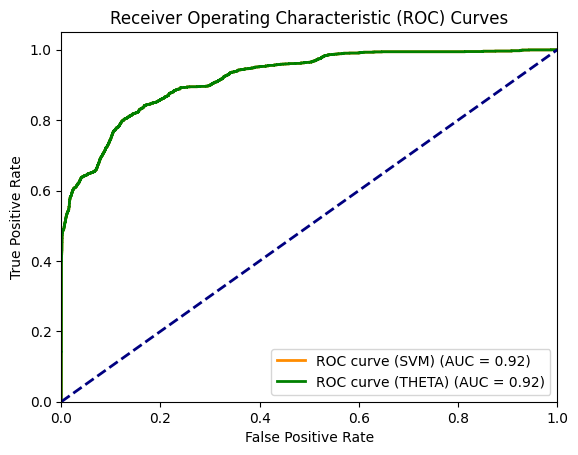

Optimal Threshold SVM: 0.10552562510463603
Optimal Threshold THETA: 0.10552562510463603


In [ ]:


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



# Train your model (example: logistic regression) for SVM values
model_svm = LogisticRegression()
model_svm.fit(X_train_scaled, y_train)

# Make predictions on the testing set for SVM values
y_pred_proba_svm = model_svm.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area for SVM values
fpr_svm, tpr_svm,thresholds_svm= roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Train your model (example: logistic regression) for THETA values
model_theta = LogisticRegression()
model_theta.fit(X_train_scaled, y_train)

# Make predictions on the testing set for THETA values
y_pred_proba_theta = model_theta.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area for THETA values
fpr_theta, tpr_theta, thresholds_theta= roc_curve(y_test, y_pred_proba_theta)
roc_auc_theta = auc(fpr_theta, tpr_theta)

# Plot ROC curves for SVM and THETA values
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (SVM) (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_theta, tpr_theta, color='green', lw=2, label='ROC curve (THETA) (AUC = %0.2f)' % roc_auc_theta)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


# Calculate distance from each point on the ROC curve to the point (0,1)
distances = np.sqrt((1 - tpr_svm)**2 + fpr_svm**2)

# Find index of threshold with minimum distance
optimal_idx = np.argmin(distances)
optimal_threshold = thresholds_svm[optimal_idx]

print("Optimal Threshold SVM:", optimal_threshold)


# Calculate distance from each point on the ROC curve to the point (0,1)
distances_theta = np.sqrt((1 - tpr_theta)**2 + fpr_theta**2)

# Find index of threshold with minimum distance
optimal_idx_theta = np.argmin(distances_theta)
optimal_threshold_theta = thresholds_theta[optimal_idx_theta]

print("Optimal Threshold THETA:", optimal_threshold_theta)







In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Separate features and target variable
X = data.drop(columns=["Activity"])  # Features
y = data["Activity"]  # Target
# Split the dataset into training and testing sets

# Feature selection using Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importance scores
importances = rf_classifier.feature_importances_

# Sort feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Calculate the threshold to select top 30% of features
threshold_idx = int(0.3 * len(importances))
threshold = importances[indices[threshold_idx]]

# Select features based on threshold
sfm = SelectFromModel(rf_classifier, threshold=threshold)

sfm.fit(X_train_scaled, y_train)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)



# Train SVM classifier on selected features
svm_classifier = SVC()
svm_classifier.fit(X_train_selected, y_train)

# Predict on the testing set
y_pred = svm_classifier.predict(X_test_selected)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print(y_pred)




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Accuracy: 0.9215574005153163

Confusion Matrix:
[[11821    39]
 [ 1057  1055]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11860
           1       0.96      0.50      0.66      2112

    accuracy                           0.92     13972
   macro avg       0.94      0.75      0.81     13972
weighted avg       0.92      0.92      0.91     13972

[0 0 0 ... 0 0 1]


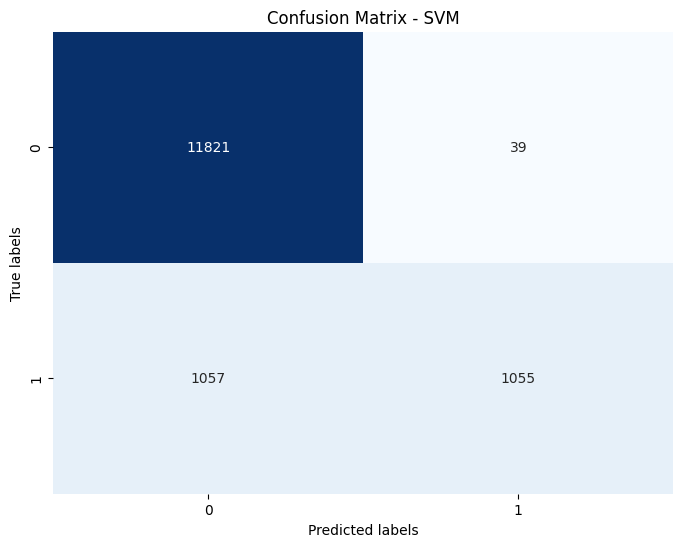

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM')
plt.show()

Accuracy: 0.9996421414257085

Confusion Matrix:
[[11858     2]
 [    3  2109]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11860
           1       1.00      1.00      1.00      2112

    accuracy                           1.00     13972
   macro avg       1.00      1.00      1.00     13972
weighted avg       1.00      1.00      1.00     13972



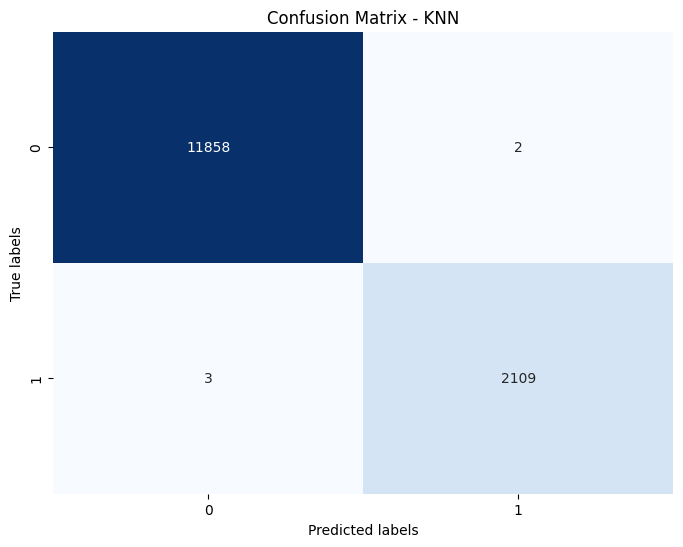

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Train KNN classifier on selected features
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_classifier.fit(X_train_selected, y_train)

# Predict on the testing set
y_pred = knn_classifier.predict(X_test_selected)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN')
plt.show()


Accuracy: 0.9954909819639278

Confusion Matrix:
[[11831    29]
 [   34  2078]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11860
           1       0.99      0.98      0.99      2112

    accuracy                           1.00     13972
   macro avg       0.99      0.99      0.99     13972
weighted avg       1.00      1.00      1.00     13972



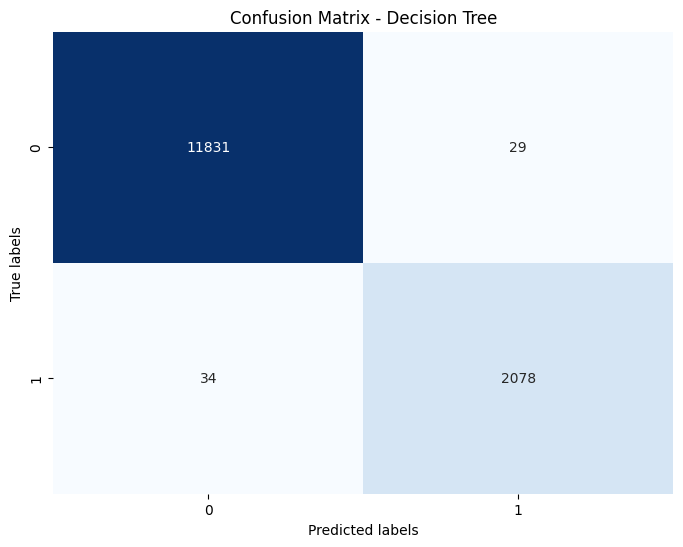

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Train Decision Tree classifier on selected features
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_selected, y_train)

# Predict on the testing set
y_pred = dt_classifier.predict(X_test_selected)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Accuracy: 0.9715860292012597

Confusion Matrix:
[[11807    53]
 [  344  1768]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     11860
           1       0.97      0.84      0.90      2112

    accuracy                           0.97     13972
   macro avg       0.97      0.92      0.94     13972
weighted avg       0.97      0.97      0.97     13972



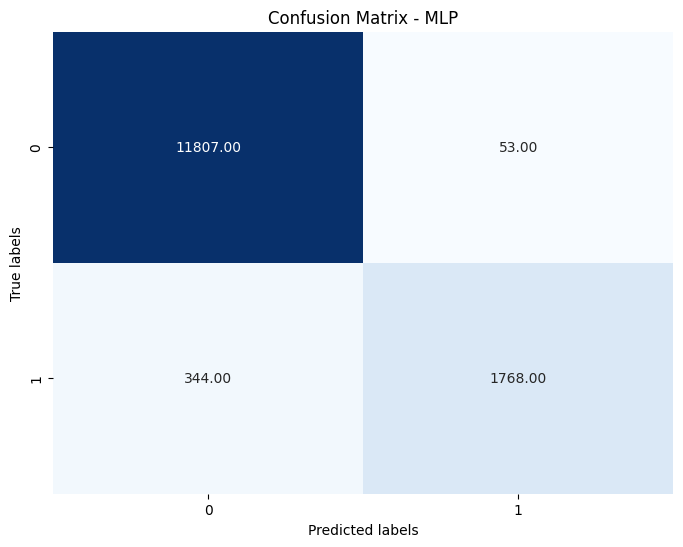

True Positives (TP): 1768


In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train MLP classifier on selected features
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
# You can adjust the parameters such as hidden_layer_sizes and max_iter as needed
mlp_classifier.fit(X_train_selected, y_train)

# Predict on the testing set
y_pred = mlp_classifier.predict(X_test_selected)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - MLP')
plt.show()

cm = confusion_matrix(y_test, y_pred)

# Access true positives (TP)
tp = cm[1, 1]  # For binary classification, where "1" is the positive class
print("True Positives (TP):", tp)


In [ ]:
import pandas as pd
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('newdata_new.csv')

# Extract the features (excluding non-numeric columns like 'Subject' and 'Activity')
features = data.drop(['Subject', 'Activity'], axis=1)

# Perform Multidimensional Scaling (MDS)
mds = MDS(n_components=2)
mds_result = mds.fit_transform(features)

# Plot the MDS result
plt.figure(figsize=(10, 8))
plt.scatter(mds_result[:, 0], mds_result[:, 1], alpha=0.5)
plt.title('Multidimensional Scaling (MDS) Visualization')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'newdata_new.csv'